#### Data Cleaning 3

Methods for dealing with outliers.

In [228]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

### Import data

In [229]:
# read in us education data 
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [230]:
# glance at the dataframe
education_df.head()

PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     nan      2,678,885          304,177   
1      1992_ALASKA      ALASKA  1992     nan      1,049,591          106,780   
2     1992_ARIZONA     ARIZONA  1992     nan      3,258,079          297,888   
3    1992_ARKANSAS    ARKANSAS  1992     nan      1,711,959          178,571   
4  1992_CALIFORNIA  CALIFORNIA  1992     nan     26,260,025        2,072,470   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1,659,028        715,680          2,653,798                1,481,703   
1        720,711        222,100            972,488                  498,362   
2      1,369,815      1,590,376          3,401,580                1,435,908   
3        958,785        574,603          1,743,022                  964,323   
4     16,546,514      7,641,041         27,138,832               14,358,922   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G  GRADES_1_8_G  GRADES_9_12_G  \
0  ...      57,948      58,025       41,167       471,564        196,386   
1  ...       9,748       8,789        6,714        79,117         30,847   
2  ...      55,433      49,081       37,410       437,127        175,210   
3  ...      34,632      36,011       27,651       281,338        123,113   
4  ...     418,418     363,296      270,675     3,286,034      1,372,011   

   GRADES_ALL_G  AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
0       676,174               208               252                  208   
1       112,335               nan               nan                  nan   
2       614,881               215               265                  206   
3       405,259               210               256                  209   
4     4,717,112               208               261                  197   

   AVG_READING_8_SCORE  
0                  nan  
1                  259  
2                  262  
3                  265  
4                  nan  

[5 rows x 25 columns]

In [231]:
# fill in nan values
for col in education_df.columns[3:30]:
    education_df.loc[:, col] = education_df.loc[:, col].fillna(education_df.loc[:, col].mean())

## 1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?


#### Total Revenue - examination for outliers

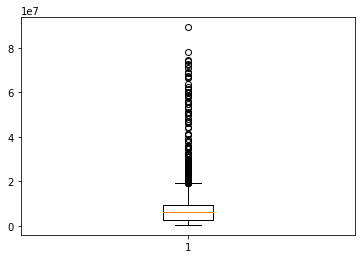

In [232]:
plt.boxplot(education_df.TOTAL_REVENUE);

Yes, with the whiskers set at 1.5(default) a number of outliers show up

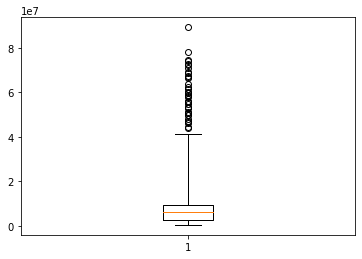

In [233]:
plt.boxplot(education_df.TOTAL_REVENUE, whis=5);

Yes, even with the whiskers set at 5 a number of outliers still show up

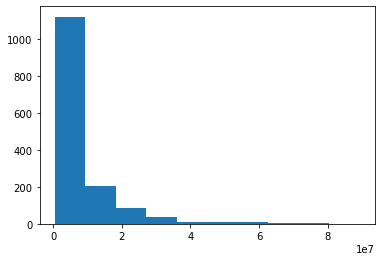

In [234]:
# visualize data distribution
plt.hist(education_df.TOTAL_REVENUE);

#### Total Expenditure - examination for outliers

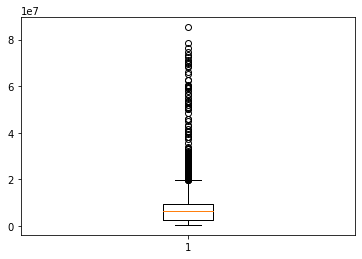

In [235]:
plt.boxplot(education_df.TOTAL_EXPENDITURE);

Yes, with the whiskers set at 1.5 a number of outliers show up

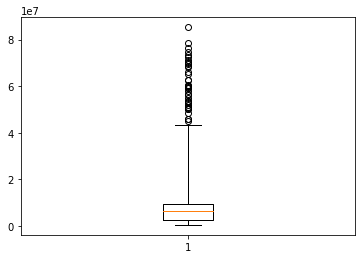

In [236]:
plt.boxplot(education_df.TOTAL_EXPENDITURE, whis=5);

Yes, even with the whiskers set at 5 a number of outliers still show up

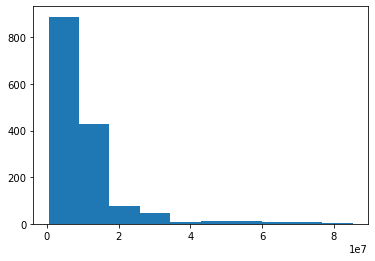

In [237]:
# visualize data distribution
plt.hist(education_df.TOTAL_EXPENDITURE);

Total expenditure has a slightly less sharp tail than total revenue.  But still the data is highly skewed.

## 2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

### <font color=darkorange>Question: how to know what threshold above/below which everything should be capped?  For instance, matplotlib box plot by default shows everything outside 1.5 standard deviations as an outlier.  Is this a rule of thumb.  Similar to how an alpha of .05 is generally used for hypothesis testing</font>

#### Use Z-scores to identify outliers at various thresholds

In [238]:
from scipy.stats import zscore

z_scores = zscore(education_df.TOTAL_REVENUE)

# iterate through threshold levels
# comparing the value of each z score
# against the value of the threshold

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([   4,   32,   56,   85,   96,  108,  137,  150,  161,  190,  201,
        213,  241,  252,  264,  292,  304,  316,  344,  355,  367,  396,
        407,  420,  449,  460,  472,  481,  501,  512,  524,  552,  564,
        576,  605,  616,  628,  633,  637,  654,  656,  662,  668,  680,
        685,  689,  706,  708,  714,  719,  731,  737,  741,  758,  760,
        763,  766,  771,  784,  789,  793,  802,  811,  813,  816,  819,
        824,  836,  842,  846,  855,  863,  865,  868,  871,  876,  891,
        897,  901,  919,  921,  924,  927,  932,  944,  950,  954,  971,
        973,  976,  979,  984,  997, 1002, 1006, 1023, 1025, 1028, 1031,
       1036, 1048, 1053, 1057, 1075, 1077, 1080, 1083, 1088, 1101, 1106,
       1110, 1127, 1129, 1132, 1135, 1140, 1152, 1157, 1161, 1178, 1180,
       1183, 1186, 1191, 1203, 1208, 1212, 1229, 1231, 1234, 1237, 1242,
       1254, 1259, 1263, 1280, 1282, 1285], dtype=int64),)
Number of

#### Use Interquartile Range (IQR) method to identify outliers at various thresholds

#### <font color=darkorange>Question: In the example they used 3rd and 1st quartiles, is this generally a good rule of thumb?</font>

In [239]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(education_df.TOTAL_REVENUE, [75 ,25])
iqr = q75 - q25

# iterate through thresholds
# np.arange function(start, stop, step)
# .5 represents the step for each iteration

for threshold in np.arange(1,7,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((education_df.TOTAL_REVENUE > max_val) 
                      | (education_df.TOTAL_REVENUE < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 194
The score threshold is: 1.5
Number of outliers is: 150
The score threshold is: 2.0
Number of outliers is: 121
The score threshold is: 2.5
Number of outliers is: 93
The score threshold is: 3.0
Number of outliers is: 66
The score threshold is: 3.5
Number of outliers is: 51
The score threshold is: 4.0
Number of outliers is: 45
The score threshold is: 4.5
Number of outliers is: 42
The score threshold is: 5.0
Number of outliers is: 39
The score threshold is: 5.5
Number of outliers is: 36
The score threshold is: 6.0
Number of outliers is: 33
The score threshold is: 6.5
Number of outliers is: 27


#### Use Winsorization to cap outliers for Revenue

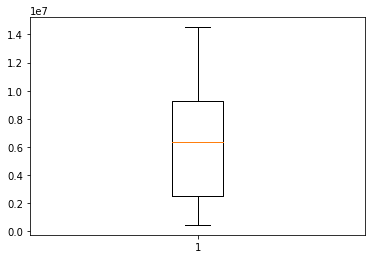

In [296]:
# one-way winsorization applied to the highest end
# of the value distribution since there are a lot of high
# values, we set the values of the outliers to the 
# value of the 85th percentile. 

plt.boxplot(winsorize(education_df.TOTAL_REVENUE, (0, 0.15)));

Using Winsorize, I had to set the percentil to the 85th in order to capture all outliers for revenue

#### Use Winsorization to cap outliers for Expense

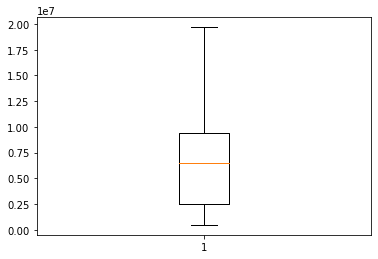

In [297]:
# one-way winsorization applied to the highest end
# of the value distribution since there are a lot of high
# values, we set the values of the outliers to the 
# value of the 90th percentile.

plt.boxplot(winsorize(education_df.TOTAL_EXPENDITURE, (0, 0.1)));

Using Windsorize, I had to set the percentil to the 90th in order to capture all outliers for total expenditure

### Use **<font color=red>monotonic</font>** transformation on the outliers.  The benefit of these is that they don't change the relative ordering of the values in the variable.  Examples of monotonic transformations are log transformations and square root transformations.

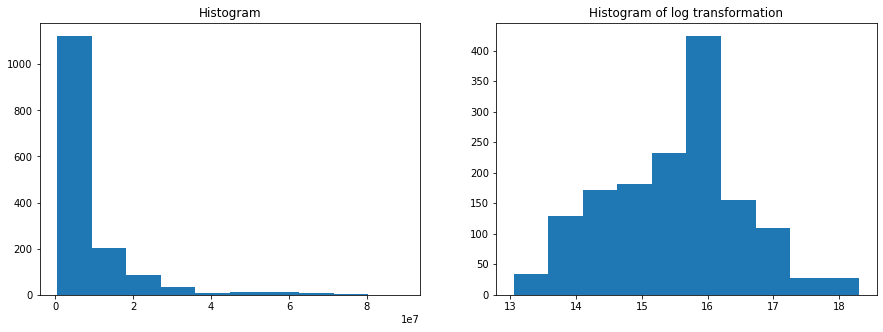

In [244]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(education_df.TOTAL_REVENUE)
plt.title("Histogram")

plt.subplot(1,2,2)
plt.hist(np.log(education_df.TOTAL_REVENUE))
plt.title("Histogram of log transformation")
plt.show()

The data definitely has the appearance of a normal distribution now.

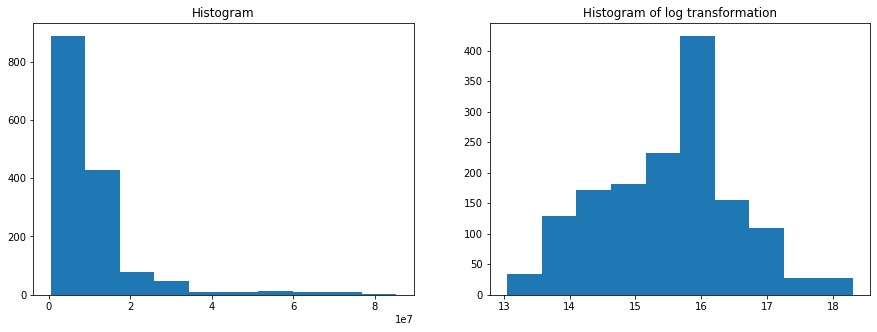

In [245]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(education_df.TOTAL_EXPENDITURE)
plt.title("Histogram")

plt.subplot(1,2,2)
plt.hist(np.log(education_df.TOTAL_REVENUE))
plt.title("Histogram of log transformation")
plt.show()

The data definitely has the appearance of a normal distribution now.

### How does log transformation affect ouliers?

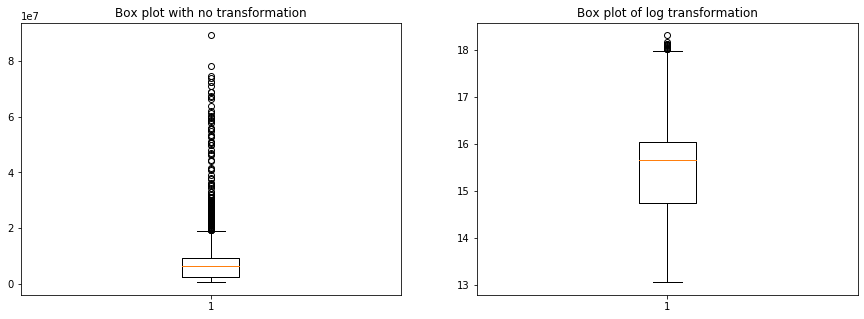

In [246]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(education_df.TOTAL_REVENUE)
plt.title("Box plot with no transformation")

plt.subplot(1,2,2)
plt.boxplot(np.log(education_df.TOTAL_REVENUE))
plt.title("Box plot of log transformation")
plt.show()

Result: log transformation has a huge benefit in diminishing outliers

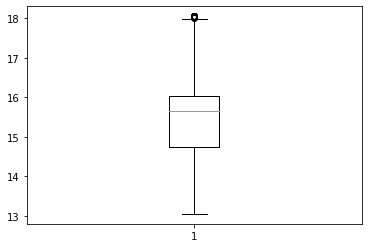

In [247]:
plt.boxplot(winsorize(np.log(education_df.TOTAL_REVENUE), (0, .005)));

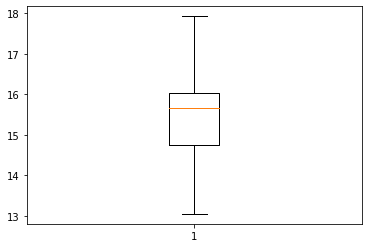

In [248]:
plt.boxplot(winsorize(np.log(education_df.TOTAL_REVENUE), (0, .01)), whis=1.5);

### Analysis/Results:
Without log transformation - I had to exclude everything above the top 15th percentile in order to eliminate boxplot outliers greater than 1.5 standard deviations away from the central tendency.

With Transformation - I only needed to exclude the top 1% of in order to eliminate boxplot outliers greater than 1.5 standard deviations away from the central tendency.

#### <font color=darkorange>Question: When I use windsorization after log transformation, a much smaller percentile setting is enough to remove outliers.  Is that generally a good thing?</font>

### 3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [337]:
education_df['budget_diff'] = education_df.TOTAL_REVENUE - education_df.TOTAL_EXPENDITURE

In [335]:
education_df['winsorized_after_diff'] = education_df.TOTAL_REVENUE - education_df.TOTAL_EXPENDITURE

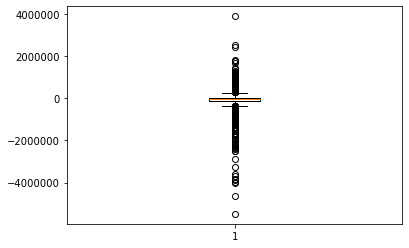

In [301]:
plt.boxplot(budget_diff);

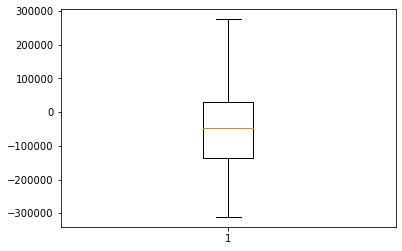

In [302]:
plt.boxplot(winsorize(budget_diff, (0.13, 0.08)));

In [336]:
education_df['winsorized_after_diff'] = winsorize(education_df['winsorized_after_diff'], (0.13, 0.08))

### 4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.

#### <font color=darkorange>Question: I ran into an issued with masked array when I did this the first time.</font>

In [303]:
budget_diff_winsorised = winsorize(education_df.TOTAL_REVENUE, (0, 0.15)) - winsorize(education_df.TOTAL_EXPENDITURE, (0, 0.1))

In [305]:
budget_diff_winsorised.describe()

AttributeError: 'MaskedArray' object has no attribute 'describe'

#### <font color=darkorange>================================</font>

In [306]:
# find budget that has been winsorized before computing the diff, and after
budget_diff_winsorised = education_df[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].copy()

In [343]:
# winsorize rev and exp to be able to compute winsorized budget
budget_diff_winsorised.TOTAL_REVENUE = winsorize(budget_diff_winsorised.TOTAL_REVENUE, (0, 0.15))
budget_diff_winsorised.TOTAL_EXPENDITURE = winsorize(budget_diff_winsorised.TOTAL_EXPENDITURE, (0, 0.1))

# winsorize budget diff
budget_diff_winsorised['winsorized_before_and_after_diff'] = budget_diff_winsorised.TOTAL_REVENUE - budget_diff_winsorised.TOTAL_EXPENDITURE

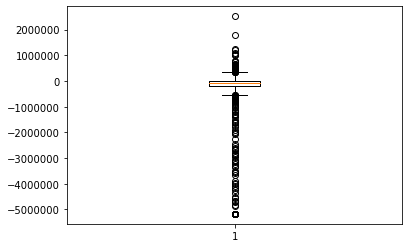

In [345]:
# are there outliers from winsorized budget
plt.boxplot(budget_diff_winsorised['winsorized_before_and_after_diff']);

In [346]:
# remove winsorized budget outliers
budget_diff_winsorised['winsorized_before_and_after_diff'] = winsorize(budget_diff_winsorised['winsorized_before_and_after_diff'], (.16, 0.04))

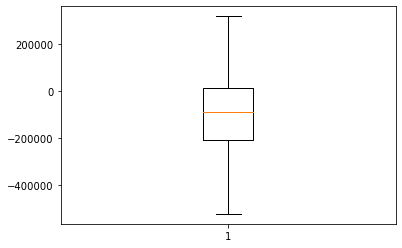

In [347]:
# verify outliers have been removed
plt.boxplot(budget_diff_winsorised['winsorized_before_and_after_diff']);

# everything looks good

#### <font color=darkorange>Result/Analysis: it's not clear to me that there is a benefit to removing outliers before finding the difference, then removing outliers.  Is there someting deeper that this comparison is getting at?</font>

### 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [348]:
pd.options.display.float_format = '{:,.0f}'.format

pd.concat([education_df.budget_diff.describe(),
          education_df.winsorized_after_diff.describe(),
          budget_diff_winsorised['winsorized_before_and_after_diff'].describe()], axis=1)

budget_diff  winsorized_after_diff  winsorized_before_and_after_diff
count        1,492                  1,492                             1,492
mean      -104,599                -50,714                          -116,001
std        531,077                166,076                           228,665
min     -5,487,742               -310,943                          -524,468
25%       -136,007               -136,007                          -210,434
50%        -48,494                -48,494                           -90,774
75%         29,654                 29,654                            15,051
max      3,897,129                275,475                           319,168

#### <font color=darkorange>Result/Analysis: Question 4 method of eliminating outliers created more extreme values for **mean, std, min, max** than question 3.</font>

### 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

#### <font color=darkorange>It seems this would depend on the story we are trying to tell.  But generally, we would want the mean, std, min, and max to be smaller versus larger.  Especially so after apply means to remove outliers.  So I think the strategy applied in method 3 is preferable.  First find the difference, then winsorization to remove outliers</font>
